# COGS 108 - Final Project 

# Overview

Question: Does location and industry contribute to the overall success (defined by the total funding and market value) of a startup more than other factors?  
Hypothesis: The location and industry of startups are the main contributors to the overall success of a startup compared to other factors. We believe so because location is often correlated with different amount of business opportunities, and industry often dictates the profit margins and market.

# Names

- Hansae Lee
- Eun Hye (Grace) Oh
- Iris Nayki
- Matthew Davis
- Tianxing Liu
- Yuting Xu

#### Group Members IDs

- A14062618
- A12960475
- A14520625
- A13050499
- A14800461
- A13361405

# Research Question

*Does location and industry contribute to the overall success (defined by the total funding and market value) of a startup more than other factors?*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Hypothesis: The location and industry of startups are the main contributors to the overall success of a startup compared to other factors. We believe so because location is often correlated with different amount of business opportunities, and industry often dictates the profit margins and market.*

# Dataset(s)

*In order to answer our research question, we found Crunchbase (https://www.crunchbase.com), a platform for finding company data. They have datasets for companies and investors, built to track startups and thier finances. Crunchbases data is private and requires a subscription to access. We contacted Crunchbase as a team to ask for access to thier datasets for the purposes of this project. They kindly agreed to help our project and granted us an API key to download thier data set free of charge.* 

- Dataset Name: Crunchbase Daily Export
- Link to the dataset: 
    - https://github.com/mdavis917/COGS108_Repo
    - https://data.crunchbase.com/docs
    - https://www.crunchbase.com/
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
df = pd.read_csv('crunchbase_export.csv' , encoding='latin-1', low_memory = False)

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
df.drop(['company_name','region','domain','short_description', 'category_list', ' employee_count ','email','phone','cb_url', 'twitter_url', 'facebook_url' , 'uuid'], axis=1, inplace=True)
df = df[df['country_code'] == 'USA']
df.drop(['country_code'], axis=1, inplace=True)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

## Most Successful By Location

There are many different cities where startups are created in the United States. As such we would like to make the data more readable by limiting it to a subset of the largest [VALUE WE CHOOSE] cities
- We can either import a population data set (like the homework) or just sort by the amount of companies in each city
- For cities that are below the threshold we bundle them in a group of other [MAY OR MAY NOT BE VALUABLE]

In addition, there are multiple criteria for success that we would like to explore. 
- Total amount of funding is a valuble metric for success in terms of raising funds. However, a startup can raise tons of capital and still burn through it all. 
- Success can also be measured by ability to be aquired, or launch as an IPO vs being closed, however a company can be aquired for pennies compared to how much it costs to fund. 
- Lastly we could use the longevity of a company as a metric of success. However a company could last with negative profits for a long time before finally closing
    
- We will explore all of these different metrics to see how they change the overall story of how location impacts these factors.

### Sorting and Cleaning Data for Location

In [3]:
# a function to convert incoming string to an integer value with no commas
def convert_fund(str_in):
    
    # remove commas
    str_in = str_in.strip()
    str_in = str_in.replace(',', '')
    str_in = str_in.strip()
    
    # convert it to an integer and return it
    return int(str_in)

In [4]:
# copy the original dataframe
df_loc = df.copy()

### Total Companies by City

Text(0, 0.5, 'Number of Companies')

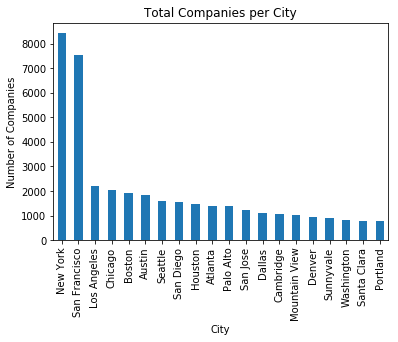

In [5]:
df_loc_copy = df_loc.copy()

# drop unneccessary columns
df_loc_copy.drop(['state_code','status','category_group_list','founded_on','first_funding_on','last_funding_on','closed_on'],axis=1,inplace=True)

# replace NaN with '0'
df_loc_copy.fillna('0', inplace=True)

# convert the values
df_loc_copy[' funding_total_usd '] = df_loc_copy[' funding_total_usd '].apply(convert_fund)

# extract number of companies per city
df_loc_city = pd.value_counts(df_loc_copy['city']).to_frame()

# extract top 20 cities
df_loc_city = df_loc_city[:20]

# visualize the data
graph = df_loc_city.plot.bar(title='Total Companies per City',legend=False)
graph.set_xlabel('City')
graph.set_ylabel('Number of Companies')

### Total Amount Funded By City

Text(0, 0.5, 'Total Funding in Million USD')

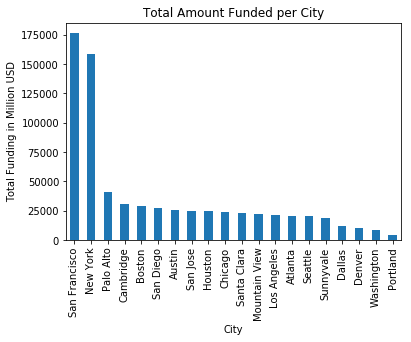

In [6]:
# dataframe to count total amount funded per city
df_loc_total_fund = pd.value_counts(df_loc_copy['city']).to_frame()
df_loc_total_fund = df_loc_total_fund[:20]

# drop the number of companies column and add total funding column
df_loc_total_fund.drop(['city'], axis=1, inplace=True)
fund = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
df_loc_total_fund['total_fund'] = fund

# drop any row with no funding
df_loc_copy = df_loc_copy[df_loc_copy[' funding_total_usd '] > 0]

# find total amounted funded by industry
for index, row in df_loc_copy.iterrows():

    # if there was funding
    if df_loc_total_fund.index.contains(row['city']):
        df_loc_total_fund.loc[row['city'], 'total_fund'] += row[' funding_total_usd ']

# sort the value
df_loc_total_fund.sort_values(by=['total_fund'], inplace=True, ascending=False)

# divide the funding by million
df_loc_total_fund = df_loc_total_fund.floordiv(1000000)

# visualize the data
graph = df_loc_total_fund.plot.bar(title='Total Amount Funded per City',legend=False)
graph.set_xlabel('City')
graph.set_ylabel('Total Funding in Million USD')

### Average Capital Raised By City

Text(0, 0.5, 'Average Funding in Million USD')

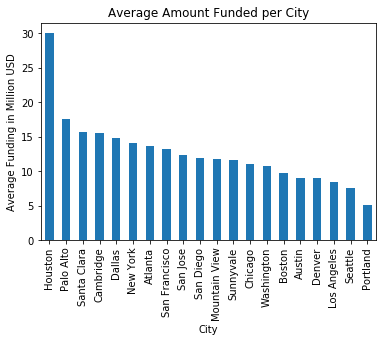

In [7]:
# dataframe to count average amount funded per industry
df_loc_avg_fund = df_loc_total_fund.copy()

# add funding rounds column
funding_rounds = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
df_loc_avg_fund['funding_rounds'] = funding_rounds

# find total amounted funded by industry
for index, row in df_loc_copy.iterrows():

    # if there was funding
    if df_loc_avg_fund.index.contains(row['city']):
        df_loc_avg_fund.loc[row['city'], 'funding_rounds'] += row['funding_rounds']

# find the average funding and drop unnecessary columns
df_loc_avg_fund['average_fund'] = df_loc_avg_fund['total_fund'] / df_loc_avg_fund['funding_rounds']
df_loc_avg_fund.drop(['total_fund','funding_rounds'],axis=1,inplace=True)

# sort the value
df_loc_avg_fund.sort_values(by=['average_fund'], inplace=True, ascending=False)

# visualize the data
graph = df_loc_avg_fund.plot.bar(title='Average Amount Funded per City',legend=False)
graph.set_xlabel('City')
graph.set_ylabel('Average Funding in Million USD')

Text(0, 0.5, 'Average Funding in Million USD')

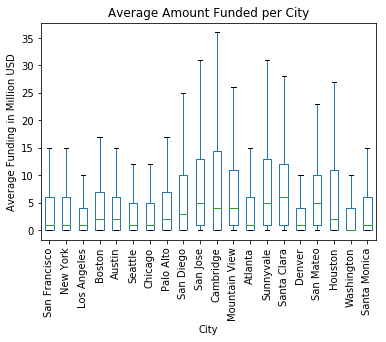

In [8]:
# copy the original dataframe
df_loc_avg_fund = df_loc_copy.copy()

# find the average funding for each company
df_loc_avg_fund['average_funding'] = df_loc_avg_fund[' funding_total_usd '] / df_loc_avg_fund['funding_rounds']

# drop unneccessary columns
df_loc_avg_fund.drop(['funding_rounds',' funding_total_usd '],axis=1,inplace=True)

# construct a dictionary with the top 20 cities
cities = pd.value_counts(df_loc_copy['city']).to_frame()[:20].index.tolist()
cities = dict.fromkeys(cities,0)
for city, value in cities.items():
    cities[city] = list()

# fill the each list with average funding of each company in its city
for index, row in df_loc_avg_fund.iterrows():
    if row['city'] in cities.keys():
        cities[row['city']].append(int(row['average_funding']))

# find maximum length of the lists
maxLength = 0
for city, funding in cities.items():
    if maxLength < len(funding):
        maxLength = len(funding)

# make the lists to have same length and fill it with NaN
for city, funding in cities.items():
    for i in range(maxLength - len(funding)):
        funding.append(np.NaN)

# build dataframe from the dictionary
df_loc_boxplot = pd.DataFrame(cities)
df_loc_boxplot = df_loc_boxplot.floordiv(1000000)

# visualize the data
graph = df_loc_boxplot.plot.box(title='Average Amount Funded per City',legend=False,rot=90,showfliers=False)
graph.set_xlabel('City')
graph.set_ylabel('Average Funding in Million USD')

### Ratio of Closed to (Aquired & IPO)

### Longevity between first operation and last operation

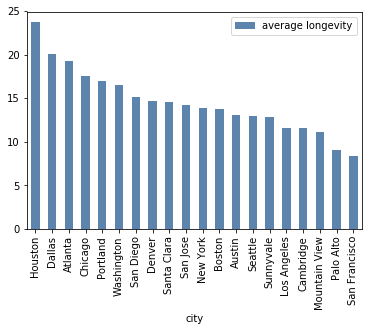

In [25]:
def longevity(row):
    if(pd.isnull(row['closed_on'])):
        return (2019 - int(row['founded_on'][0:4]))
    else:
        return (int(row['closed_on'][0:4]) - int(row['founded_on'][0:4]))
df_temp = df_loc.copy()
df_temp.dropna(subset=['founded_on'], inplace=True)
df_temp['longevity'] = df_temp.apply(lambda row: longevity(row), axis=1)
#Data for location
df_city = df_loc['city'].value_counts().index[:20]
df_avgL = np.zeros(len(df_city))
for i in range(len(df_city)):
    df_avgL[i] = df_temp.loc[df_loc['city'] == df_city[i]]['longevity'].mean()

df_longevity = pd.DataFrame({'city':df_city, 'average longevity':df_avgL})
df_longevity = df_longevity.sort_values(by = ['average longevity'],ascending = False)
df_longevity.plot.bar(x='city', y='average longevity', color = (0.2, 0.4, 0.6, 0.8))

## Most Successful By Industry

There are many industires that these startups are involved in. Some very unique topics and some very broad that don't say alot about what the company does. As such we need to find some of the most popular industies and see how each company fits into these. For each company, the data shows a list of categories the company is involved in. To clean this data we will create a bucket of the most popular 20 industies where each company that reports that industry will be in it. (Note some companies can be in multiple buckets) This list of 20 industries will have some broad terms like apps removed and replaced with the next highest topic occurance. This choice of non-specificity is done manually. And we have a description as to why the choice was removed.

We will then analyze this data by the same criteria of success as done in location

### Sorting and Cleaning Data By Industry 

First we sort by all of the industries listed for every company. We drop any that don't have an industry reported, rather than mark as other, because they might still belong in one of these other lists.

In [10]:
# copy the original dataframe
df_ind = df.copy()

# drop rows with no industry category and irrelevant columns
df_ind.dropna(subset=['category_group_list'], inplace=True)
df_ind.drop(['state_code','first_funding_on','last_funding_on'], axis=1, inplace=True)

Here, we are going to use a function written by James Allen from https://gist.github.com/jlln.

This function efficiently split Pandas Dataframe cells containing lists into multiple rows, duplicating the other column's values.

In [11]:
# CODE FRAGMENT USED FROM https://gist.github.com/jlln/338b4b0b55bd6984f883
def splitDataFrameList(df,target_column,separator):
    '''
    df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [12]:
# split the companies with multiple industries into separate rows
df_ind_split = splitDataFrameList(df_ind,'category_group_list','|')

# rename the column
df_ind_split.rename(index=str, columns={'category_group_list':'industry'}, inplace=True)

Now some of these topics are rather broad. I.E. (Software, Hardware, Apps, Internet Services, Information Technology, and Science and Engineering) So we will ignore these categories. Otherwise for each category a company has listed we will create a new row with just the one category

In [13]:
bad_industry = ['software','internet services','information technology','hardware','science and engineering']
for ind in bad_industry:
    df_ind_split.drop(df_ind_split.loc[df_ind_split['industry'] == ind].index, inplace=True)

Finally, we convert the data type of funding_total_usd from string to integer

In [15]:
# replace NaN with '0'
df_ind_split.fillna({' funding_total_usd ':'0'}, inplace=True)

# convert the values
df_ind_split[' funding_total_usd '] = df_ind_split[' funding_total_usd '].apply(convert_fund)

### Total Companies by Industry

Text(0, 0.5, 'Number of Companies')

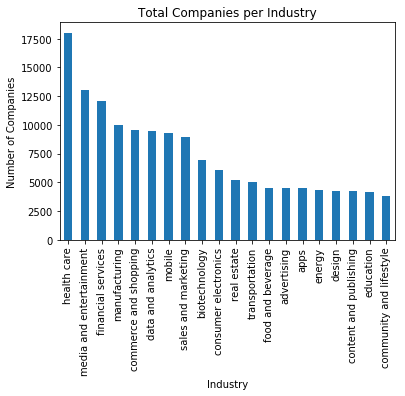

In [16]:
# extract number of companies per industry
df_companies_by_industry = pd.value_counts(df_ind_split['industry']).to_frame()

# extract top 20 industries
df_companies_by_industry = df_companies_by_industry[:20]

# visualize the data
graph = df_companies_by_industry.plot.bar(title='Total Companies per Industry',legend=False)
graph.set_xlabel('Industry')
graph.set_ylabel('Number of Companies')

### Total Amount Funded by Industry

Text(0, 0.5, 'Total Funding in Million USD')

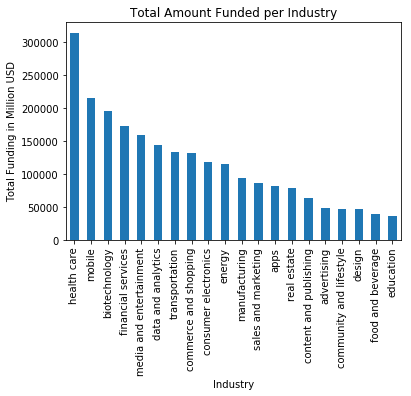

In [17]:
# dataframe to count total amount funded per industry
df_ind_total_fund = pd.value_counts(df_ind_split['industry']).to_frame()
df_ind_total_fund = df_ind_total_fund[:20]

# drop the number of companies column and add total funding column
df_ind_total_fund.drop(['industry'], axis=1, inplace=True)
fund = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
df_ind_total_fund['total_fund'] = fund

# drop any row with no funding
df_ind_split = df_ind_split[df_ind_split[' funding_total_usd '] > 0]

# find total amounted funded by industry
for index, row in df_ind_split.iterrows():

    # if there was funding
    if df_ind_total_fund.index.contains(row['industry']):
        df_ind_total_fund.loc[row['industry'], 'total_fund'] += row[' funding_total_usd ']

# sort the value
df_ind_total_fund.sort_values(by=['total_fund'], inplace=True, ascending=False)

# divide the funding by million
df_ind_total_fund = df_ind_total_fund.floordiv(1000000)

# visualize the data
graph = df_ind_total_fund.plot.bar(title='Total Amount Funded per Industry',legend=False)
graph.set_xlabel('Industry')
graph.set_ylabel('Total Funding in Million USD')

### Average Capital Raised By Industry

Text(0, 0.5, 'Average Funding in Million USD')

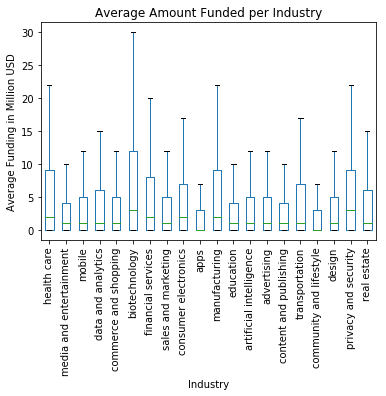

In [19]:
# find average funding by each company
df_ind_split['average_funding'] = df_ind_split[' funding_total_usd '] / df_ind_split['funding_rounds']

# construct a dictionary with the top 20 industries
industries = pd.value_counts(df_ind_split['industry']).to_frame()[:20].index.tolist()
industries = dict.fromkeys(industries,0)
for industry, value in industries.items():
    industries[industry] = list()

# fill the each list with average funding of each company in its industry
for index, row in df_ind_split.iterrows():
    if row['industry'] in industries.keys():
        industries[row['industry']].append(int(row['average_funding']))

# find maximum length of the lists
maxLength = 0
for industry, funding in industries.items():
    if maxLength < len(funding):
        maxLength = len(funding)

# make the lists to have same length and fill it with NaN
for industry, funding in industries.items():
    for i in range(maxLength - len(funding)):
        funding.append(np.NaN)

# build dataframe from the dictionary
df_ind_boxplot = pd.DataFrame(industries)
df_ind_boxplot = df_ind_boxplot.floordiv(1000000)

# visualize the data
graph = df_ind_boxplot.plot.box(title='Average Amount Funded per Industry',legend=False,rot=90,showfliers=False)
graph.set_xlabel('Industry')
graph.set_ylabel('Average Funding in Million USD')

Text(0, 0.5, 'Average Funding in Million USD')

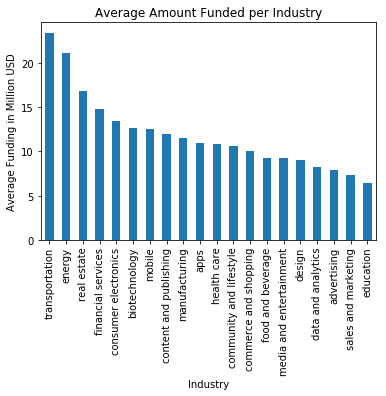

In [20]:
# dataframe to count average amount funded per industry
df_ind_avg_fund = df_ind_total_fund.copy()

# add funding rounds column
funding_rounds = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
df_ind_avg_fund['funding_rounds'] = funding_rounds

# find total amounted funded by industry
for index, row in df_ind_split.iterrows():

    # if there was funding
    if df_ind_avg_fund.index.contains(row['industry']):
        df_ind_avg_fund.loc[row['industry'], 'funding_rounds'] += row['funding_rounds']

# find the average funding and drop unnecessary columns
df_ind_avg_fund['average_fund'] = df_ind_avg_fund['total_fund'] / df_ind_avg_fund['funding_rounds']
df_ind_avg_fund.drop(['total_fund','funding_rounds'],axis=1,inplace=True)

# sort the value
df_ind_avg_fund.sort_values(by=['average_fund'], inplace=True, ascending=False)

# visualize the data
graph = df_ind_avg_fund.plot.bar(title='Average Amount Funded per Industry',legend=False)
graph.set_xlabel('Industry')
graph.set_ylabel('Average Funding in Million USD')

### Ratio of Closed to (Aquired & IPO)

In [21]:
list = dict(pd.value_counts(df_ind_split['industry']))
industries = dict()
df_ind_split = df_ind_split.reset_index(drop=True)
print(pd.value_counts(df_ind_split['status']))

for (x,y) in list.items():
    industries[x] = [0,0]

for i in range(len(df_ind_split)):
    ind = df_ind_split.loc[i]['industry']
    stat = df_ind_split.loc[i]['status']
    
    if stat=='closed':
        industries[ind][0]+=1
    elif stat=='ipo'or stat=='acquired':
        industries[ind][1]+=1

operating    80723
acquired     16498
closed        9437
ipo           3740
Name: status, dtype: int64


                                         0         1
health care                       0.219547  0.780453
media and entertainment           0.402429  0.597571
mobile                            0.367227  0.632773
data and analytics                0.240024  0.759976
commerce and shopping             0.397059  0.602941
biotechnology                     0.181490  0.818510
financial services                0.328311  0.671689
sales and marketing               0.291995  0.708005
consumer electronics              0.300216  0.699784
apps                              0.395006  0.604994
manufacturing                     0.247454  0.752546
education                         0.350913  0.649087
artificial intelligence           0.228324  0.771676
advertising                       0.295943  0.704057
content and publishing            0.353887  0.646113
transportation                    0.283302  0.716698
community and lifestyle           0.454545  0.545455
design                            0.358595  0.

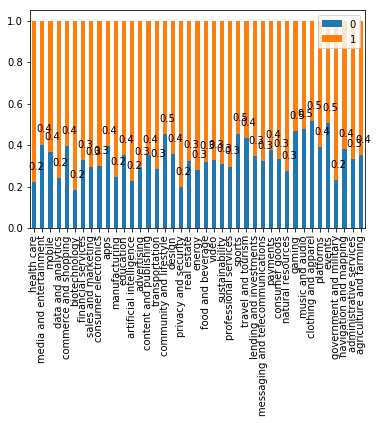

In [22]:
for (x,y) in list.items():
    sum = industries[x][0]+industries[x][1]
    industries[x][0] /= sum
    industries[x][1] /= sum 

newdf = pd.DataFrame.from_dict(industries,orient='index')
print(newdf)

ax = newdf.plot(kind='bar',stacked=True)
for rec, label in zip(ax.patches,newdf[0].round(1).astype(str)):
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() , height + .05, label,
           ha = 'center', va='bottom')
    
plt.legend(loc='upper right')

Analysis for closed v. (acquired & IPO):
Top 3 with lowest closed rate:

Manufacturing
Natural resources
Consumer goods
Top 3 with highest closed rate:

Apps
Mobile
Gaming
Because the graph shows no significant outliers, we can conclude that ratio of closed and (IPO & acquired) is not a strong indicator for predicting the success of industries.



### Longevity between first operation and last operation

In [23]:
df_ind_split[df_ind_split['founded_on'] == '0']

,funding_total_usd,industry,city,closed_on,founded_on,funding_rounds,status,average_funding


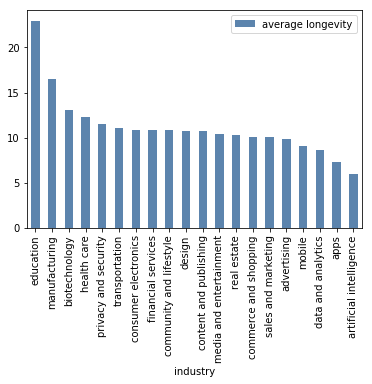

In [26]:
df_temp = df_ind_split.copy()
df_temp.head()
df_temp.dropna(subset=['founded_on'], inplace=True)
df_temp['longevity'] = df_temp.apply(lambda row: longevity(row), axis=1)
#Data for location
df_industry = df_ind_split['industry'].value_counts().index[:20]
df_avgL = np.zeros(len(df_industry))
for i in range(len(df_industry)):
    df_avgL[i] = df_temp.loc[df_ind_split['industry'] == df_industry[i]]['longevity'].mean()

df_longevity = pd.DataFrame({'industry':df_industry, 'average longevity':df_avgL})
df_longevity = df_longevity.sort_values(by = ['average longevity'],ascending = False)
df_longevity.plot.bar(x='industry', y='average longevity', color = (0.2, 0.4, 0.6, 0.8))


## Most Successful By Industry and Location

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*